In [1]:
import matplotlib.pyplot as plt
import numpy as np
from SALib.analyze.morris import analyze as morris_analyze
from SALib.sample.morris import sample as morris_sample
from helpers.helpers import design_point_executor

Covasim 3.0.7 (2021-06-29) — © 2021 by IDM


In [2]:
r = 10  # number of replications with 4<=r<=10
num_levels = 6  # parameter for method of morris
par_list = ['beta', 'asymp_factor', 'rel_severe_prob', 'rel_death_prob']
k = len(par_list)  # number of covasim variables to analyse
problem = {
    'num_vars': k,
    'names': par_list,
    'bounds': [[0.005, 0.005 * num_levels],
               [0.5, 0.5 * num_levels],
               [0.75, 0.75 * num_levels],
               [0.75, 0.75 * num_levels]]
}

In [3]:
# sample the r trajectories
X = morris_sample(problem, r, num_levels=num_levels)
print(f"Created {len(X)} design points")
print("First design point: ", X[0], "\n Last design point: ", X[-1])
executor = design_point_executor(par_list, n_reps=10)
results = map(executor, X)
# execute the simulations
Y = np.fromiter(results, dtype=np.float64)  
print("Average number of dead people over 10 simulation runs:")
print("For first design point:", Y[0])
print("For last design point:", Y[-1])

Created 50 design points
First design point:  [0.02 2.   1.5  3.75] 
 Last design point:  [0.025 1.    3.    1.5  ]
Average number of dead people over 10 simulation runs:
For first design point: 425.9
For last design point: 584.1


In [4]:
# calculate elementary effects
Si = morris_analyze(problem, X, Y, num_levels=num_levels, print_to_console=True)

                         mu     mu_star       sigma  mu_star_conf
beta             590.433333  590.433333  670.721972    398.015672
asymp_factor     310.450000  310.450000  237.902058    139.851188
rel_severe_prob  443.050000  443.050000  521.698923    288.361945
rel_death_prob   187.233333  187.233333  155.356047     89.839352


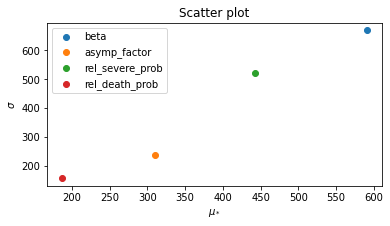

In [5]:
# plot first against higher order elementary effects
mu_star = Si['mu_star'].data
sigma = Si['sigma']
plt.figure(figsize=(6, 3))
plt.title("Scatter plot")
for par, m, s in zip(par_list, mu_star, sigma):
    plt.scatter(m, s, label=par)
plt.xlabel(r'$\mu_*$')
plt.ylabel(r'$\sigma$')
plt.legend();